In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import os
import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation
from projection import project
from otsu_thresh import otsu

def get_data(folder):
    data = os.listdir(folder)
    data = [folder + "/" + d for d in data]
    return data

def get_features(im):
    hist = cv2.calcHist([im],[0],None,[255],[0,255])
    norm_hist = hist/np.max(hist)
    var = sum(norm_hist * (np.arange(len(norm_hist)).reshape(-1, 1)))[0]

    if len(im.shape) > 2:
		im = otsu(im)
    projection = project(im, 0)
    num = 0 if projection[0] == 0 else 1
    for i, p in enumerate(projection):
        if p > 0 and projection[i-1] == 0:
            num += 1
    return var/1000 * 2.5, num


Using TensorFlow backend.


In [2]:
imgs = get_data('./newspaper/images')
txts = get_data('./newspaper/text')
data = imgs + txts
X = np.asarray([get_features(cv2.imread(im)) for im in data])
X = X.reshape((X.shape[0], X.shape[1]))
Y = np.asarray([0 for i in range(len(imgs))] + [1 for i in range(len(txts))])
Y = keras.utils.to_categorical(Y)


In [4]:
D = zip(X, Y)
np.random.shuffle(D)
X, Y = zip(*D)
X = np.asarray(X)
Y = np.asarray(Y)
print X.shape, Y.shape

(3107, 2) (3107, 2)


In [5]:
model = Sequential()

model.add(Dense(32, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(),
             loss = keras.losses.binary_crossentropy, metrics=['accuracy'])
# model.load_weights('block_filter.h5')
model.fit(X[:-100], Y[:-100], batch_size=1, epochs=30, validation_data=(X[-100:], Y[-100:]))

model.save_weights('block_filter.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                96        
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_4 (Activation)    (None, 2)                 0         
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
Train on 3007 samples, validate on 100 samples
Epoch 1/30
3007/3007 [==============================] - 12s - loss: 0.1917 - acc: 0.9438 - val_loss: 0.2046 - val_acc: 0.9900
Epoch 2/30
3007/3007 [==============================] - 11s - loss: 0.1771 - acc: 0.9633 - val_loss: 0.

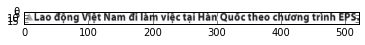

[[ 1.176  1.   ]]
[ 0.06869251  0.93024987]
Text


In [23]:

im = cv2.imread('./sont/out/5.png')
# im = cv2.imread('./newspaper/text/57.png')
plt.imshow(im)
plt.show()
ft = get_features(im)
ft = np.asarray(ft)
ft[0] = ft[0]/2.5
ft = ft.reshape(1, ft.shape[0])
pred = model.predict(ft)[0]
print ft
print pred
if np.argmax(pred) == 1:
    print "Text"
else:
    print "Image"

In [ ]:
len(t)

In [ ]:
np.mean(t)